In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# PREDICTING FUNCTION

In [104]:
# read data for experimentally determined structures in complex with active molecules
df = pd.read_csv('data/364_interaction_energies_state_function_v4.txt', sep='\t')

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to structure_df
structure_df = df.copy()
# structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
structure_df.drop(['State'], axis = 1, inplace = True)

In [105]:
# read data for best scoring docked poses of inactive molecules
df = pd.read_csv('data/dude_docking_data/dude_interaction_energies.txt', sep='\t')

#drop index
df.drop('index', axis = 1, inplace=True)

#copy df to dock_tructure_df
dock_structure_df = df.copy()
# dock_structure_df.drop(['PDBID','State'], axis = 1, inplace = True)
dock_structure_df.drop(['State'], axis = 1, inplace = True)

In [106]:
# join both datasets
frames = [structure_df, dock_structure_df] 
structure_df = pd.concat(frames)

In [107]:
structure_df['Function'].value_counts()

Inactive             285
Antagonist           183
Agonist              148
Inverse agonist       23
Agonist (partial)     10
Name: Function, dtype: int64

In [108]:
# get columns with 'sum' in their name
sum_cols = [col for col in structure_df.columns if 'sum' in col]

# create empty list for residue numbers
resnums = []

# loop through sum columns and count interactions that don't have nonzero energies
for col in sum_cols:
    resnum = col[:4]
    resnums.append(resnum)

# drop columns from df in which > 10% of entries are NaN
for resnum in resnums:
    intenergysum_col = resnum + '_intenergysum'
    inttype1_col = resnum + '_inttype1'
    intenergy1_col = resnum + '_intenergy1'
    inttype2_col = resnum + '_inttype2'
    intenergy2_col = resnum + '_intenergy2'
    
    print('structures with interactions at position', resnum, ':', structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum())
    if structure_df[intenergysum_col][structure_df[intenergysum_col] != 0].value_counts().sum() < 10:
        structure_df.drop([intenergysum_col, inttype1_col, intenergy1_col, inttype2_col, intenergy2_col], axis = 1, inplace = True)
        print('dropped columns for residue: ', resnum, '\n')

structures with interactions at position 1.21 : 0
dropped columns for residue:  1.21 

structures with interactions at position 1.22 : 0
dropped columns for residue:  1.22 

structures with interactions at position 1.23 : 0
dropped columns for residue:  1.23 

structures with interactions at position 1.24 : 0
dropped columns for residue:  1.24 

structures with interactions at position 1.25 : 0
dropped columns for residue:  1.25 

structures with interactions at position 1.26 : 0
dropped columns for residue:  1.26 

structures with interactions at position 1.27 : 1
dropped columns for residue:  1.27 

structures with interactions at position 1.28 : 0
dropped columns for residue:  1.28 

structures with interactions at position 1.29 : 0
dropped columns for residue:  1.29 

structures with interactions at position 1.30 : 2
dropped columns for residue:  1.30 

structures with interactions at position 1.31 : 9
dropped columns for residue:  1.31 

structures with interactions at position 1.

structures with interactions at position 3.51 : 0
dropped columns for residue:  3.51 

structures with interactions at position 3.52 : 0
dropped columns for residue:  3.52 

structures with interactions at position 3.53 : 0
dropped columns for residue:  3.53 

structures with interactions at position 3.54 : 0
dropped columns for residue:  3.54 

structures with interactions at position 3.55 : 0
dropped columns for residue:  3.55 

structures with interactions at position 3.56 : 0
dropped columns for residue:  3.56 

structures with interactions at position 3.57 : 0
dropped columns for residue:  3.57 

structures with interactions at position 3.58 : 0
dropped columns for residue:  3.58 

structures with interactions at position 3.59 : 0
dropped columns for residue:  3.59 

structures with interactions at position 3.60 : 0
dropped columns for residue:  3.60 

structures with interactions at position 3.61 : 0
dropped columns for residue:  3.61 

structures with interactions at position 3.

dropped columns for residue:  5.74 

structures with interactions at position 5.75 : 0
dropped columns for residue:  5.75 

structures with interactions at position 5.76 : 0
dropped columns for residue:  5.76 

structures with interactions at position 5.77 : 0
dropped columns for residue:  5.77 

structures with interactions at position 5.78 : 0
dropped columns for residue:  5.78 

structures with interactions at position 5.79 : 0
dropped columns for residue:  5.79 

structures with interactions at position 5.80 : 0
dropped columns for residue:  5.80 

structures with interactions at position 5.81 : 0
dropped columns for residue:  5.81 

structures with interactions at position 5.82 : 0
dropped columns for residue:  5.82 

structures with interactions at position 5.83 : 0
dropped columns for residue:  5.83 

structures with interactions at position 5.84 : 0
dropped columns for residue:  5.84 

structures with interactions at position 5.85 : 0
dropped columns for residue:  5.85 

struct

In [109]:
structure_df

,PDBID,Function,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,7EW2,Agonist,0.0,None,0.0,None,0.0,0.0,None,0.0,...,0.0,None,0.0,None,0.0,0.0,None,0.0,None,0.0
1,7EW3,Agonist,0.0,None,0.0,None,0.0,0.0,None,0.0,...,0.0,None,0.0,None,0.0,0.0,None,0.0,None,0.0
2,7EW4,Agonist,0.0,None,0.0,None,0.0,0.0,None,0.0,...,0.0,None,0.0,None,0.0,0.0,None,0.0,None,0.0
3,7EW1,Agonist,0.0,None,0.0,None,0.0,0.0,None,0.0,...,0.0,None,0.0,None,0.0,0.0,None,0.0,None,0.0
4,7LD4,Agonist,0.0,None,0.0,None,0.0,0.0,None,0.0,...,-0.1,Hbond,-0.1,Distance,0.0,-0.6,Hbond,-0.5,Hbond,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,3PBL,Inactive,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,0.0,None,0.0,None,0.0,-0.2,Arene,-0.2,Distance,0.0
281,3PBL,Inactive,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,0.0,None,0.0,None,0.0,0.0,Distance,0.0,Distance,0.0
282,3PBL,Inactive,NaN,NaN,NaN,NaN,NaN,0.0,None,0.0,...,0.0,None,0.0,None,0.0,0.0,Distance,0.0,Distance,0.0
283,3PBL,Inactive,NaN,NaN,NaN,NaN,NaN,0.0,Distance,0.0,...,0.0,None,0.0,None,0.0,0.0,Distance,0.0,Distance,0.0


In [110]:
np.log10(structure_df['3.32_intenergysum'] + 40)

0      1.602060
1      1.602060
2      1.602060
3      1.602060
4      1.602060
         ...   
280    1.602060
281    1.573245
282    1.578639
283    1.559907
284    1.578878
Name: 3.32_intenergysum, Length: 649, dtype: float64

<AxesSubplot:>

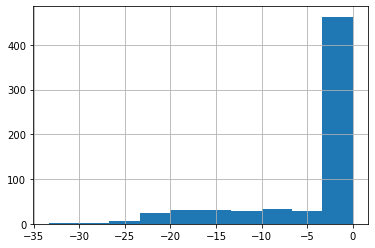

In [111]:
structure_df['3.32_intenergysum'].hist()

In [112]:
sum_cols = [col for col in structure_df.columns if 'sum' in col]

for col in sum_cols:
    structure_df[col] = np.log10(structure_df[col] + 40)

<AxesSubplot:>

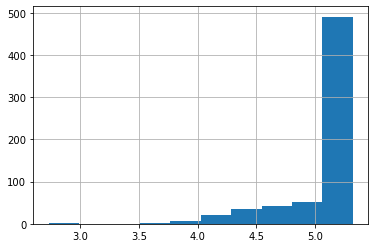

In [113]:
structure_df['3.32_intenergysum'].hist()

In [74]:
structure_df1 = structure_df.replace('Agonist (partial)', 'Agonist')

In [75]:
structure_df2 = structure_df1.replace('Inverse agonist', 'Antagonist')

In [76]:
actual_fxns = structure_df['Function']
actual_fxns1 = structure_df1['Function']
actual_fxns2 = structure_df2['Function']

In [77]:
actual_fxns.unique()

array(['Agonist', 'Antagonist', 'Agonist (partial)', 'Inverse agonist',
       'Inactive'], dtype=object)

In [78]:
# label encoding
def encode_labels(df):
    # create instance of labelencoder
    encoder = OrdinalEncoder()
    le = LabelEncoder()

    cols = [col for col in df.columns if 'type' in col]

    # loop though all columns and convert strings to categorical integer variables
    for col in cols:
        df[col] = encoder.fit_transform(np.array(df[col].tolist()).reshape(-1, 1))


    # encode states as integers
    # get columns with 'type' in their name
    cols = [col for col in df.columns if 'Function' in col]

    # loop though all columns and convert strings to categorical integer variables
    for col in cols:
        df[col] = le.fit_transform(df[col])
        
    return (df, le)

In [79]:
(structure_df, encoder) = encode_labels(structure_df)
(structure_df1, encoder1) = encode_labels(structure_df1)
(structure_df2, encoder2) = encode_labels(structure_df2)

In [80]:
encoder.classes_

array(['Agonist', 'Agonist (partial)', 'Antagonist', 'Inactive',
       'Inverse agonist'], dtype=object)

In [81]:
# assign target classes to y
y = structure_df['Function']
y1 = structure_df1['Function']
y2 = structure_df2['Function']

# assign data to X
X = structure_df.drop(['Function'], axis = 1)
X1 = structure_df1.drop(['Function'], axis = 1)
X2 = structure_df2.drop(['Function'], axis = 1)

# create actual_state column with non-encoded states
X['actual_fxn'] = actual_fxns
X1['actual_fxn'] = actual_fxns1
X2['actual_fxn'] = actual_fxns2

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [83]:
def scale_impute(dataframe):
    # get colnames
    colnames = list(dataframe.drop(['actual_fxn', 'PDBID'], axis = 1).columns)
    fxns_df = dataframe['actual_fxn']
    #state_df.reset_index(inplace=True)
    df = dataframe.drop(['actual_fxn'], axis = 1)
    PDBIDs = list(dataframe['PDBID'])

    # impute data
    from sklearn.impute import SimpleImputer
    my_imputer = SimpleImputer()
    df_imputed = pd.DataFrame(my_imputer.fit_transform(df.iloc[:,1:]))

    # scale data
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    to_scale = [col for col in df_imputed.columns.values]
    scaler.fit(df_imputed[to_scale])

    # predict z-scores on the test set
    df_imputed[to_scale] = scaler.transform(df_imputed[to_scale]) 

    # #rename columns
    df_imputed.columns = colnames
    
    df_imputed.insert(0, 'PDBID',  PDBIDs)

    # display scaled values
    display(df_imputed)
    
    return(df_imputed, fxns_df)

In [84]:
(X_train_imputed, X_train_fxns) = scale_impute(X_train)
(X_test_imputed, X_test_fxns) = scale_impute(X_test)

(X_train_imputed1, X_train_fxns1) = scale_impute(X_train1)
(X_test_imputed1, X_test_fxns1) = scale_impute(X_test1)

(X_train_imputed2, X_train_fxns2) = scale_impute(X_train2)
(X_test_imputed2, X_test_fxns2) = scale_impute(X_test2)

,PDBID,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,1.39_inttype2,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,5IUA,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
1,6LPK,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
2,6LPL,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
3,6TQ9,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
4,2VT4,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,1.111331,0.087294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,6TOT,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,-2.444568,0.18237,-2.585307,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
482,6RZ4,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
483,3PBL,-7.545273e-13,1.904068,0.000000,2.236965,-5.981787e-18,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
484,3EML,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294


,PDBID,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,1.39_inttype2,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,3ODU,0.115644,-4.109612,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,1.264156,0.341718,1.317939,0.151699
1,5D5B,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
2,3NY8,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
3,3EML,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
4,6TOS,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,-2.284424,0.176683,-2.467628,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,3EML,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
159,6H7M,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
160,4DAJ,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,-6.115298,-0.900182,-3.146313,-1.020782,-8.303057,0.328062,-0.626279,0.341718,-0.754319,0.151699
161,7VDM,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,1.264156,0.341718,1.317939,0.151699


,PDBID,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,1.39_inttype2,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,5IUA,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
1,6LPK,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
2,6LPL,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
3,6TQ9,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
4,2VT4,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,1.111331,0.087294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,6TOT,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,-2.444568,0.18237,-2.585307,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
482,6RZ4,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
483,3PBL,-7.545273e-13,1.904068,0.000000,2.236965,-5.981787e-18,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
484,3EML,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294


,PDBID,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,1.39_inttype2,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,3ODU,0.115644,-4.109612,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,1.264156,0.341718,1.317939,0.151699
1,5D5B,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
2,3NY8,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
3,3EML,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
4,6TOS,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,-2.284424,0.176683,-2.467628,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,3EML,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
159,6H7M,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
160,4DAJ,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,-6.115298,-0.900182,-3.146313,-1.020782,-8.303057,0.328062,-0.626279,0.341718,-0.754319,0.151699
161,7VDM,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,1.264156,0.341718,1.317939,0.151699


,PDBID,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,1.39_inttype2,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,5IUA,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
1,6LPK,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
2,6LPL,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
3,6TQ9,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
4,2VT4,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,1.111331,0.087294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,6TOT,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,-2.444568,0.18237,-2.585307,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
482,6RZ4,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294
483,3PBL,-7.545273e-13,1.904068,0.000000,2.236965,-5.981787e-18,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,-0.755771,0.124789,-0.901489,0.087294
484,3EML,1.259524e-01,0.224618,0.123375,0.142235,4.695510e-02,0.095326,0.251026,0.092033,0.23921,...,0.201876,0.449610,0.18237,0.388561,0.131203,0.105501,1.182512,0.124789,1.111331,0.087294


,PDBID,1.35_intenergysum,1.35_inttype1,1.35_intenergy1,1.35_inttype2,1.35_intenergy2,1.39_intenergysum,1.39_inttype1,1.39_intenergy1,1.39_inttype2,...,7.42_intenergysum,7.42_inttype1,7.42_intenergy1,7.42_inttype2,7.42_intenergy2,7.43_intenergysum,7.43_inttype1,7.43_intenergy1,7.43_inttype2,7.43_intenergy2
0,3ODU,0.115644,-4.109612,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,1.264156,0.341718,1.317939,0.151699
1,5D5B,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
2,3NY8,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
3,3EML,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
4,6TOS,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,-2.284424,0.176683,-2.467628,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,3EML,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
159,6H7M,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,-0.626279,0.341718,-0.754319,0.151699
160,4DAJ,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,-6.115298,-0.900182,-3.146313,-1.020782,-8.303057,0.328062,-0.626279,0.341718,-0.754319,0.151699
161,7VDM,0.115644,0.116677,0.142215,0.098955,0.08158,0.152345,0.229663,0.152981,0.238961,...,0.193031,0.484060,0.176683,0.426065,0.155682,0.328062,1.264156,0.341718,1.317939,0.151699


In [85]:
def transform(df):
    from sklearn.preprocessing import PowerTransformer
    pt = PowerTransformer()
    colnames = df.columns
    df_pt = pd.DataFrame(pt.fit_transform(df))
    df_pt.columns = colnames
    return df_pt

In [40]:
X_train_imputed.iloc[:,1:] = transform(X_train_imputed.iloc[:,1:])
X_train_imputed1.iloc[:,1:] = transform(X_train_imputed1.iloc[:,1:])
X_train_imputed2.iloc[:,1:] = transform(X_train_imputed2.iloc[:,1:])
X_test_imputed.iloc[:,1:] = transform(X_test_imputed.iloc[:,1:])
X_test_imputed1.iloc[:,1:] = transform(X_test_imputed1.iloc[:,1:])
X_test_imputed2.iloc[:,1:] = transform(X_test_imputed2.iloc[:,1:])

C:\Users\Greg\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\Greg\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\Greg\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [86]:
X_train_fxns = X_train_fxns.reset_index()
X_train_fxns.drop(['index'], axis = 1, inplace = True)

X_test_fxns = X_test_fxns.reset_index()
X_test_fxns.drop(['index'], axis = 1, inplace = True)

X_train_fxns1 = X_train_fxns1.reset_index()
X_train_fxns1.drop(['index'], axis = 1, inplace = True)

X_test_fxns1 = X_test_fxns1.reset_index()
X_test_fxns1.drop(['index'], axis = 1, inplace = True)

X_train_fxns2 = X_train_fxns2.reset_index()
X_train_fxns2.drop(['index'], axis = 1, inplace = True)

X_test_fxns2 = X_test_fxns2.reset_index()
X_test_fxns2.drop(['index'], axis = 1, inplace = True)

In [87]:
def train_test_predict(train_df, train_y, test_df, test_y, encoder):
    #Import Random Forest Model
    from sklearn.ensemble import RandomForestClassifier

    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=500, random_state=1, class_weight = 'balanced_subsample')

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(train_df.iloc[:, 1:], train_y)
    
    # print classes able to be predicted by the model (check 8/1/22)
    # print(clf.classes_)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score, KFold
    import numpy as np

    # cross-validation
    scores = cross_val_score(clf, train_df.iloc[:, 1:], train_y, cv=5)
    print("Mean cross-validation score: %.2f" % scores.mean())

    # k-fold CV
    kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
    kf_cv_scores = cross_val_score(clf, train_df.iloc[:, 1:], train_y, cv=kfold)
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    
    # test set predictions
    y_pred = clf.predict(test_df.iloc[:, 1:])
    
    # print unique classes predicted on the testing data (check 8/1/22)
    # print(np.unique(y_pred))

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    # reverse label encoding
    y_pred_actual = encoder.inverse_transform(y_pred)
    y_test_actual = encoder.inverse_transform(test_y)

    data = {'y_Actual':    y_test_actual,
            'y_Predicted': y_pred_actual
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print ('\n', confusion_matrix, '\n')
    
     # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(test_y, y_pred)
    precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    print("Accuracy:","{:.2f}".format(acc))
    print("Precision:","{:.2f}".format(precision))
    print("Recall:","{:.2f}".format(recall), '\n')

In [88]:
train_test_predict(X_train_imputed, y_train, X_test_imputed, y_test, encoder)

Mean cross-validation score: 0.84
K-fold CV average score: 0.86

 Predicted          Agonist  Agonist (partial)  Antagonist  Inactive  \
Actual                                                                
Agonist                 30                  0           4         2   
Agonist (partial)        1                  1           0         1   
Antagonist               9                  0          41         2   
Inactive                 0                  0           2        58   
Inverse agonist          2                  0           9         0   

Predicted          Inverse agonist  
Actual                              
Agonist                          0  
Agonist (partial)                0  
Antagonist                       0  
Inactive                         0  
Inverse agonist                  1   

Accuracy: 0.80
Precision: 0.82
Recall: 0.80 



In [89]:
train_test_predict(X_train_imputed1, y_train1, X_test_imputed1, y_test1, encoder1)

Mean cross-validation score: 0.85
K-fold CV average score: 0.86

 Predicted        Agonist  Antagonist  Inactive  Inverse agonist
Actual                                                         
Agonist               35           2         2                0
Antagonist             9          43         0                0
Inactive               1           2        57                0
Inverse agonist        3           8         0                1 

Accuracy: 0.83
Precision: 0.85
Recall: 0.83 



In [45]:
train_test_predict(X_train_imputed2, y_train2, X_test_imputed2, y_test2, encoder2)

Mean cross-validation score: 0.86
K-fold CV average score: 0.88

 Predicted   Agonist  Antagonist  Inactive
Actual                                   
Agonist          33           4         2
Antagonist        8          56         0
Inactive          3           1        56 

Accuracy: 0.89
Precision: 0.90
Recall: 0.89 



In [45]:
len(list(X_test_imputed1['PDBID'].unique()))

105

## GridSearch for best parameters

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [47]:
params_to_test = {
    'n_estimators':[10, 100, 250, 500, 750, 1000]
}

In [48]:
rf_model = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(rf_model, param_grid=params_to_test, cv=10, scoring='accuracy')

grid_search.fit(X_train_imputed1.iloc[:, 1:], y_train1)

best_params = grid_search.best_params_ 

In [35]:
best_params

{'n_estimators': 500}

## XGBoost

In [33]:
def train_test_predict_xgboost(train_df, train_y, test_df, test_y, encoder):
    #Import Random Forest Model
    from sklearn.ensemble import RandomForestClassifier
    
    import xgboost as xgb

    xgbc = xgb.XGBClassifier(use_label_encoder=False,
                             eval_metric='mlogloss',
                             n_estimators=500,
                             random_state = 1,
                             learning_rate = 0.05
                            )


    #Train the model using the training sets y_pred=clf.predict(X_test)
    xgbc.fit(train_df, train_y)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score, KFold
    import numpy as np

    # cross-validation
    scores = cross_val_score(xgbc, train_df, train_y, cv=5)
    print("Mean cross-validation score: %.2f" % scores.mean())

    # k-fold CV
    kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
    kf_cv_scores = cross_val_score(xgbc, train_df, train_y, cv=kfold)
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    
    # test set predictions
    y_pred = xgbc.predict(test_df)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    # reverse label encoding
    y_pred_actual = encoder.inverse_transform(y_pred)
    y_test_actual = encoder.inverse_transform(test_y)

    data = {'y_Actual':    y_test_actual,
            'y_Predicted': y_pred_actual
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print ('\n', confusion_matrix, '\n')
    
     # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(test_y, y_pred)
    precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    print("Accuracy:","{:.2f}".format(acc))
    print("Precision:","{:.2f}".format(precision))
    print("Recall:","{:.2f}".format(recall), '\n')

In [34]:
train_test_predict_xgboost(X_train_imputed, y_train, X_test_imputed, y_test, encoder)

Mean cross-validation score: 0.84
K-fold CV average score: 0.85

 Predicted          Agonist  Antagonist  Inactive  Inverse agonist
Actual                                                           
Agonist                 29           2         4                1
Agonist (partial)        1           0         2                0
Antagonist              10          40         2                0
Inactive                 1           0        59                0
Inverse agonist          1           5         4                2 

Accuracy: 0.80
Precision: 0.79
Recall: 0.81 



In [35]:
train_test_predict_xgboost(X_train_imputed1, y_train1, X_test_imputed1, y_test1, encoder1)

Mean cross-validation score: 0.85
K-fold CV average score: 0.86

 Predicted        Agonist  Antagonist  Inactive  Inverse agonist
Actual                                                         
Agonist               31           2         5                1
Antagonist            10          40         2                0
Inactive               1           0        59                0
Inverse agonist        1           4         5                2 

Accuracy: 0.81
Precision: 0.80
Recall: 0.81 



In [37]:
train_test_predict_xgboost(X_train_imputed2, y_train2, X_test_imputed2, y_test2, encoder2)

Mean cross-validation score: 0.85
K-fold CV average score: 0.89

 Predicted   Agonist  Antagonist  Inactive
Actual                                   
Agonist          31           4         4
Antagonist       10          47         7
Inactive          1           0        59 

Accuracy: 0.84
Precision: 0.85
Recall: 0.84 



## LightGBM

In [52]:
def train_test_predict_lgbm(train_df, train_y, test_df, test_y, encoder):
    #Import Random Forest Model
    import lightgbm as lgb
    
    # create classifier
    clf = lgb.LGBMClassifier(n_estimators = 100, random_state = 1)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(train_df, train_y)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score, KFold
    import numpy as np

    # cross-validation
    scores = cross_val_score(clf, train_df, train_y, cv=5)
    print("Mean cross-validation score: %.2f" % scores.mean())

    # k-fold CV
    kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
    kf_cv_scores = cross_val_score(clf, train_df, train_y, cv=kfold)
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    
    # test set predictions
    y_pred = clf.predict(test_df)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    # reverse label encoding
    y_pred_actual = encoder.inverse_transform(y_pred)
    y_test_actual = encoder.inverse_transform(test_y)

    data = {'y_Actual':    y_test_actual,
            'y_Predicted': y_pred_actual
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print ('\n', confusion_matrix, '\n')
    
     # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(test_y, y_pred)
    precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    print("Accuracy:","{:.2f}".format(acc))
    print("Precision:","{:.2f}".format(precision))
    print("Recall:","{:.2f}".format(recall), '\n')

In [53]:
train_test_predict_lgbm(X_train_imputed, y_train, X_test_imputed, y_test, encoder)

Mean cross-validation score: 0.84
K-fold CV average score: 0.86

 Predicted          Agonist  Agonist (partial)  Antagonist  Inactive  \
Actual                                                                
Agonist                 27                  0           5         4   
Agonist (partial)        1                  1           0         1   
Antagonist               7                  0          40         5   
Inactive                 0                  0           0        60   
Inverse agonist          0                  0           5         6   

Predicted          Inverse agonist  
Actual                              
Agonist                          0  
Agonist (partial)                0  
Antagonist                       0  
Inactive                         0  
Inverse agonist                  1   

Accuracy: 0.79
Precision: 0.81
Recall: 0.79 



In [54]:
train_test_predict_lgbm(X_train_imputed1, y_train1, X_test_imputed1, y_test1, encoder1)

Mean cross-validation score: 0.84
K-fold CV average score: 0.87

 Predicted        Agonist  Antagonist  Inactive  Inverse agonist
Actual                                                         
Agonist               30           3         6                0
Antagonist            10          39         3                0
Inactive               0           0        60                0
Inverse agonist        0           5         6                1 

Accuracy: 0.80
Precision: 0.81
Recall: 0.80 



In [55]:
train_test_predict_lgbm(X_train_imputed2, y_train2, X_test_imputed2, y_test2, encoder2)

Mean cross-validation score: 0.87
K-fold CV average score: 0.90

 Predicted   Agonist  Antagonist  Inactive
Actual                                   
Agonist          30           3         6
Antagonist       11          44         9
Inactive          0           0        60 

Accuracy: 0.82
Precision: 0.84
Recall: 0.82 



## SVM

In [77]:
def train_test_predict_svm(train_df, train_y, test_df, test_y, encoder):
    from sklearn import svm

    #Create a svm Classifier
    clf = svm.SVC(kernel='rbf', tol = 1e-4) # Linear Kernel

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(train_df, train_y)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score, KFold
    import numpy as np

    # cross-validation
    scores = cross_val_score(clf, train_df, train_y, cv=5)
    print("Mean cross-validation score: %.2f" % scores.mean())

    # k-fold CV
    kfold = KFold(n_splits=10, shuffle=True, random_state = 1)
    kf_cv_scores = cross_val_score(clf, train_df, train_y, cv=kfold)
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
    
    # test set predictions
    y_pred = clf.predict(test_df)

    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics

    # reverse label encoding
    y_pred_actual = encoder.inverse_transform(y_pred)
    y_test_actual = encoder.inverse_transform(test_y)

    data = {'y_Actual':    y_test_actual,
            'y_Predicted': y_pred_actual
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print ('\n', confusion_matrix, '\n')
    
     # Model Accuracy, how often is the classifier correct?
    acc = metrics.accuracy_score(test_y, y_pred)
    precision = metrics.precision_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    recall = metrics.recall_score(test_y, y_pred, average = 'weighted', labels=np.unique(y_pred))
    print("Accuracy:","{:.2f}".format(acc))
    print("Precision:","{:.2f}".format(precision))
    print("Recall:","{:.2f}".format(recall), '\n')

In [78]:
train_test_predict_svm(X_train_imputed1, y_train1, X_test_imputed1, y_test1, encoder1)

Mean cross-validation score: 0.81
K-fold CV average score: 0.83

 Predicted        Agonist  Antagonist  Inactive
Actual                                        
Agonist               32           1         6
Antagonist            12          32         8
Inactive               0           1        59
Inverse agonist        3           4         5 

Accuracy: 0.75
Precision: 0.77
Recall: 0.81 

